In [3]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pystan

In [4]:
model = """
data {
    int<lower=0> N;
    int y[N];
}
parameters {
    real<lower=0,upper=1> theta;
}

model {
    theta ~ beta(1,1); //uniform distribution
    y ~ bernoulli(theta);
}
"""

In [5]:
model = pystan.StanModel(model_name='bias_model', model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL bias_model_be36b49764ccfed9f1d585cb71db2eae NOW.


In [34]:
y = np.repeat([0, 1], [150, 350])

In [35]:
data = {
    'N': 500,
    'y': y
}

In [36]:
model.show()

StanModel object 'bias_model_be36b49764ccfed9f1d585cb71db2eae' coded as follows:

data {
    int<lower=0> N;
    int y[N];
}
parameters {
    real<lower=0,upper=1> theta;
}

model {
    theta ~ beta(1,1); //uniform distribution
    y ~ bernoulli(theta);
}



In [37]:
result = model.sampling(data=data, iter=1000, warmup=200, chains=3, thin=1)

In [38]:
result

Inference for Stan model: bias_model_be36b49764ccfed9f1d585cb71db2eae.
3 chains, each with iter=1000; warmup=200; thin=1; 
post-warmup draws per chain=800, total post-warmup draws=2400.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta    0.7  6.7e-4   0.02   0.66   0.68    0.7   0.71   0.74    947   1.01
lp__  -307.5    0.02   0.72 -309.6 -307.6 -307.2 -307.0 -306.9   1042    1.0

Samples were drawn using NUTS at Thu Jun 27 17:08:18 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

Figure(432x288)


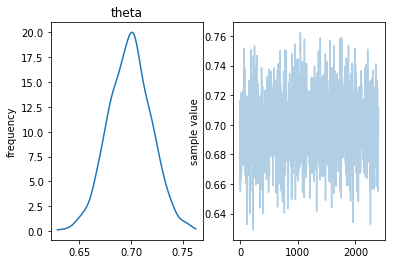

In [39]:
print(result.traceplot())